In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#loading the data
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Visulation

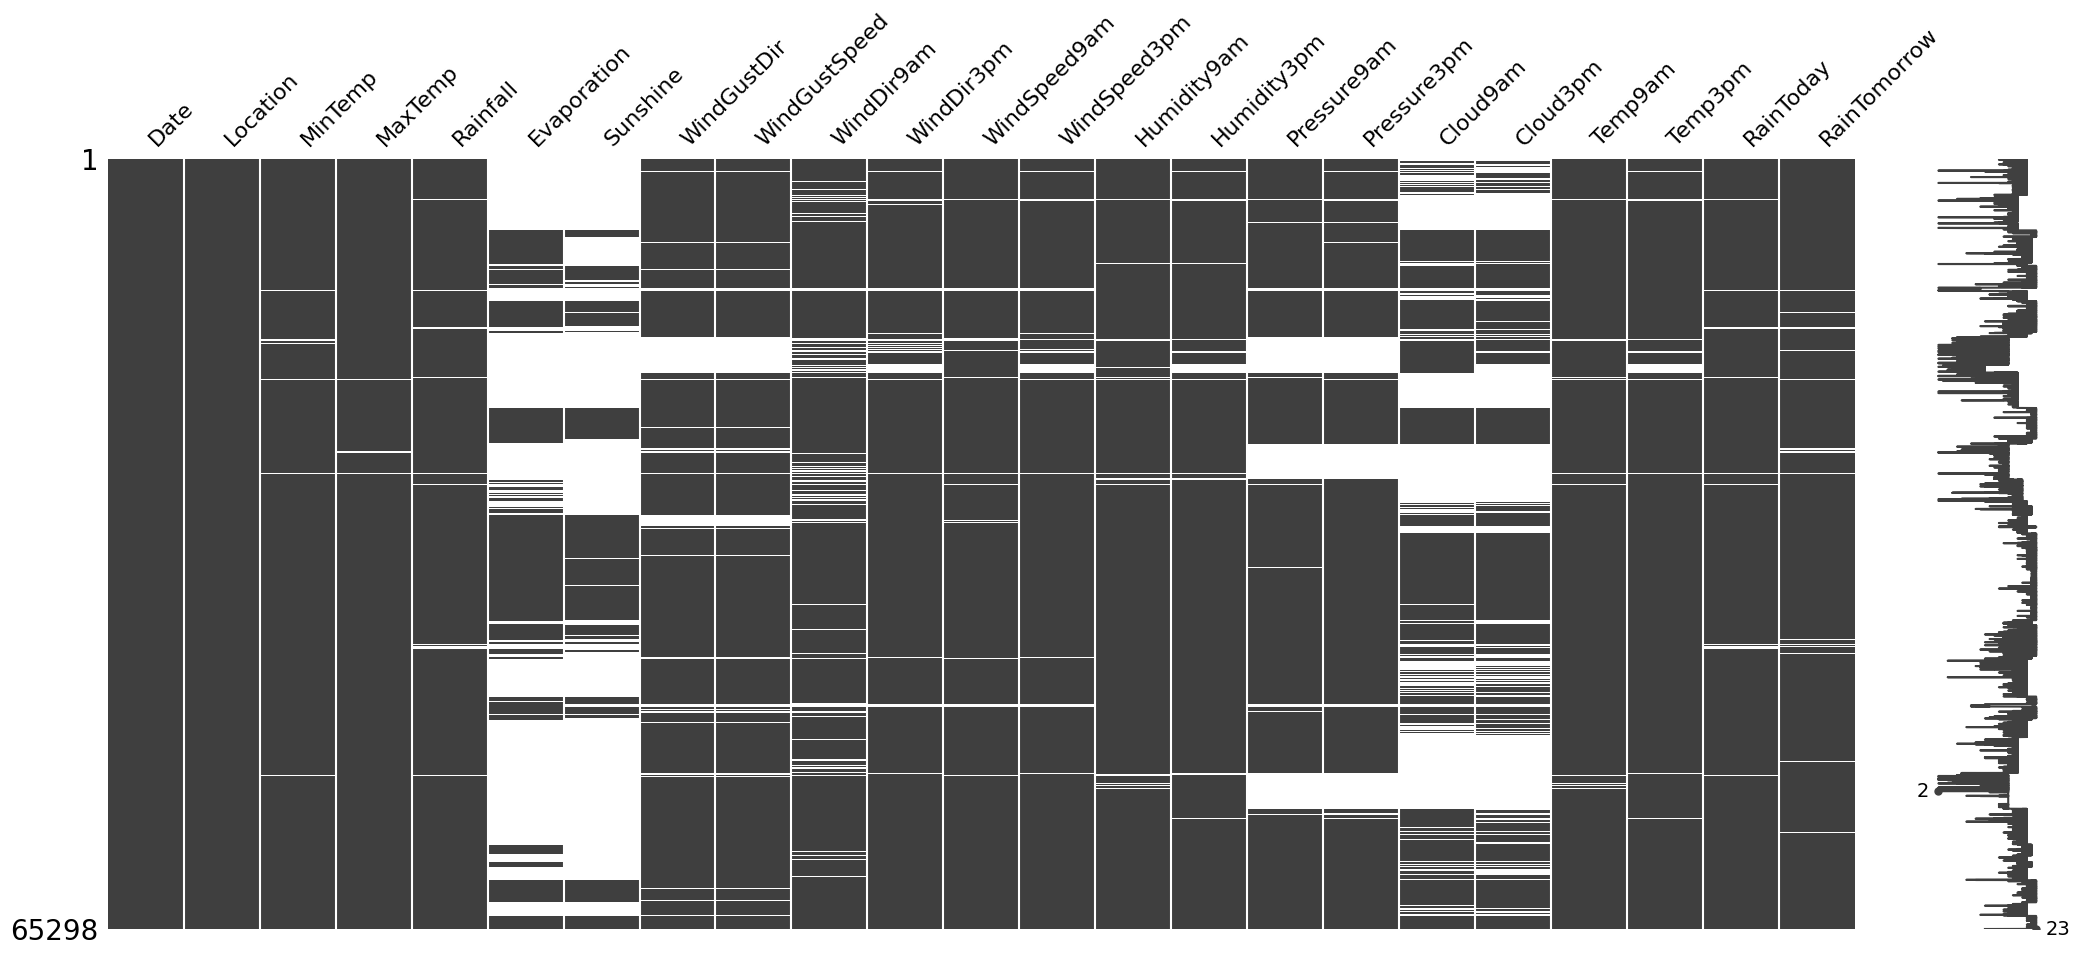

In [ ]:
#step - 1 identitying the missing values using matrix plot
msno.matrix(df)
plt.show()

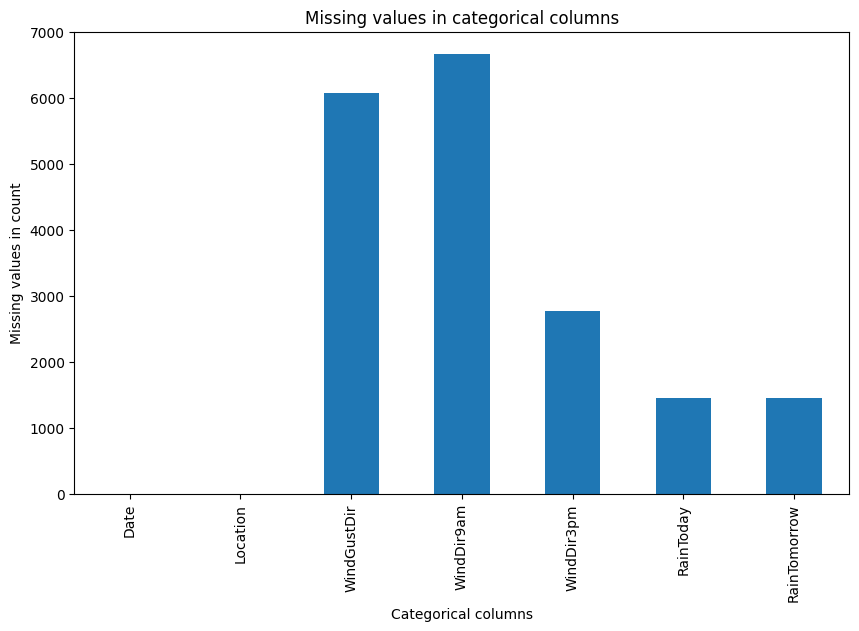

In [ ]:
#step - 2 identifying the categorical values using bar plot
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
missing_vals = df[categorical_cols].isnull().sum()
missing_vals.plot(kind='bar', figsize=(10,6))
plt.title('Missing values in categorical columns')
plt.xlabel('Categorical columns')
plt.ylabel('Missing values in count')
plt.show()

<Figure size 1000x600 with 0 Axes>

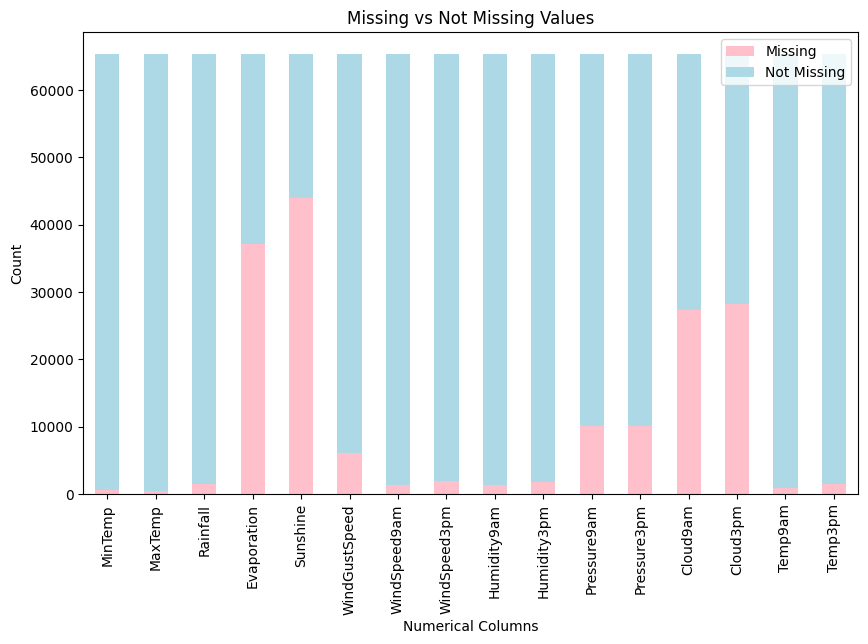

In [ ]:
##step - 3 identifying the numerical values using bar plot
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
missing_data = df[numerical_cols].isnull().sum()
non_missing_data = df[numerical_cols].notnull().sum()
stacked_data = pd.DataFrame({'Missing': missing_data, 'Not Missing': non_missing_data})

#stacked bar chart for missing vs not non misiing values
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True, color=['pink', 'lightblue'], figsize=(10, 6))
plt.title('Missing vs Not Missing Values')
plt.xlabel('Numerical Columns')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


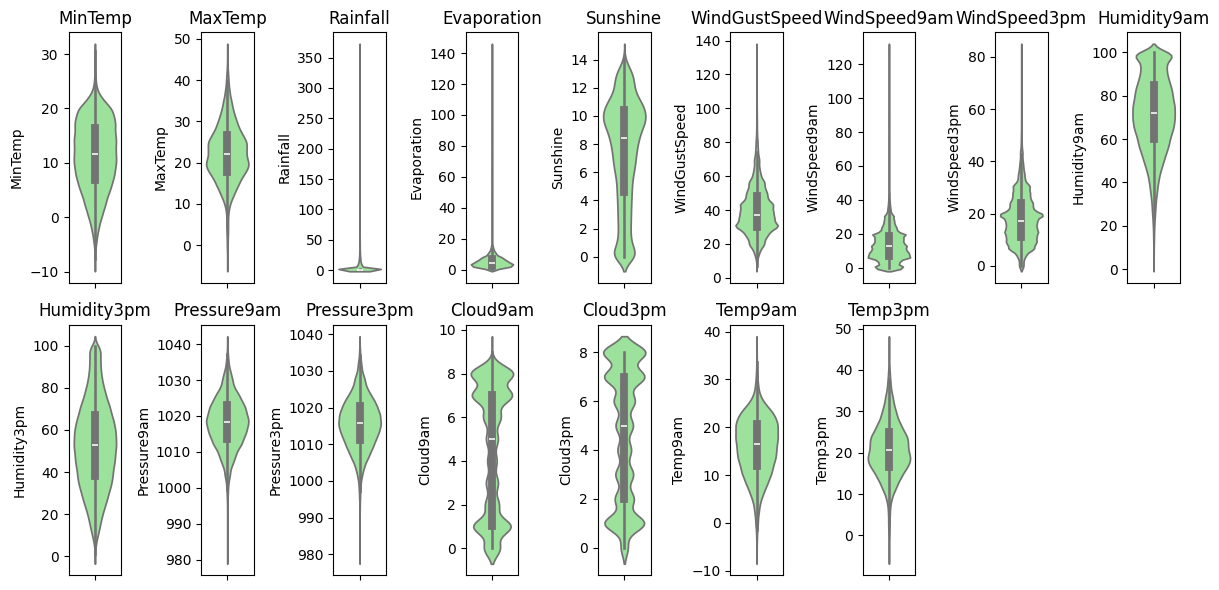

In [ ]:
#step - 4 identifying the potential outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + 1, i + 1)
    sns.violinplot(y=df[column], color='lightgreen')
    plt.title(column)

plt.tight_layout()
plt.show()

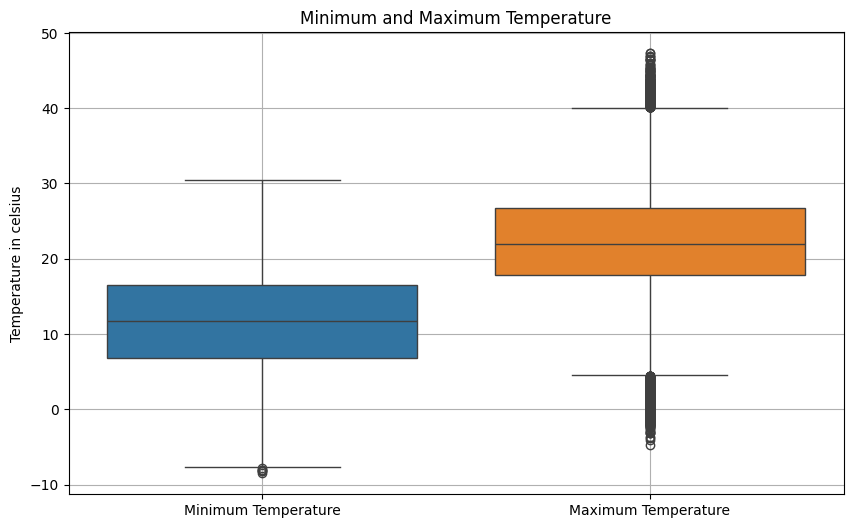

In [ ]:
#step - 5 Box plot for min vs max temp
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MinTemp', 'MaxTemp']])
plt.title('Minimum and Maximum Temperature')
plt.ylabel('Temperature in celsius')
plt.xticks([0, 1], ['Minimum Temperature', 'Maximum Temperature'])
plt.grid(True)
plt.show()


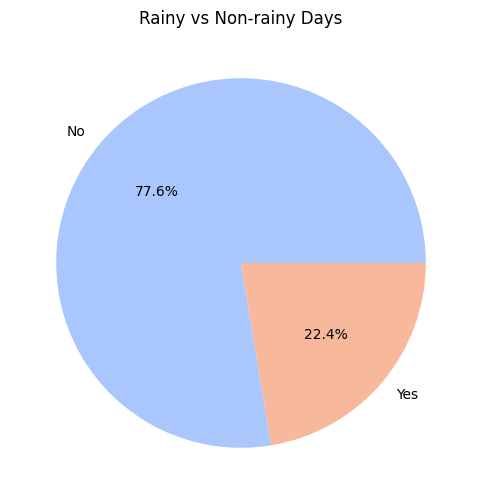

In [ ]:
#step - 6 count of rainy vs non rainy days
plt.figure(figsize=(10, 6))
plt.pie(df['RainTomorrow'].value_counts(), labels=df['RainTomorrow'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(df['RainTomorrow'].value_counts())))
plt.title('Rainy vs Non-rainy Days')
plt.show()

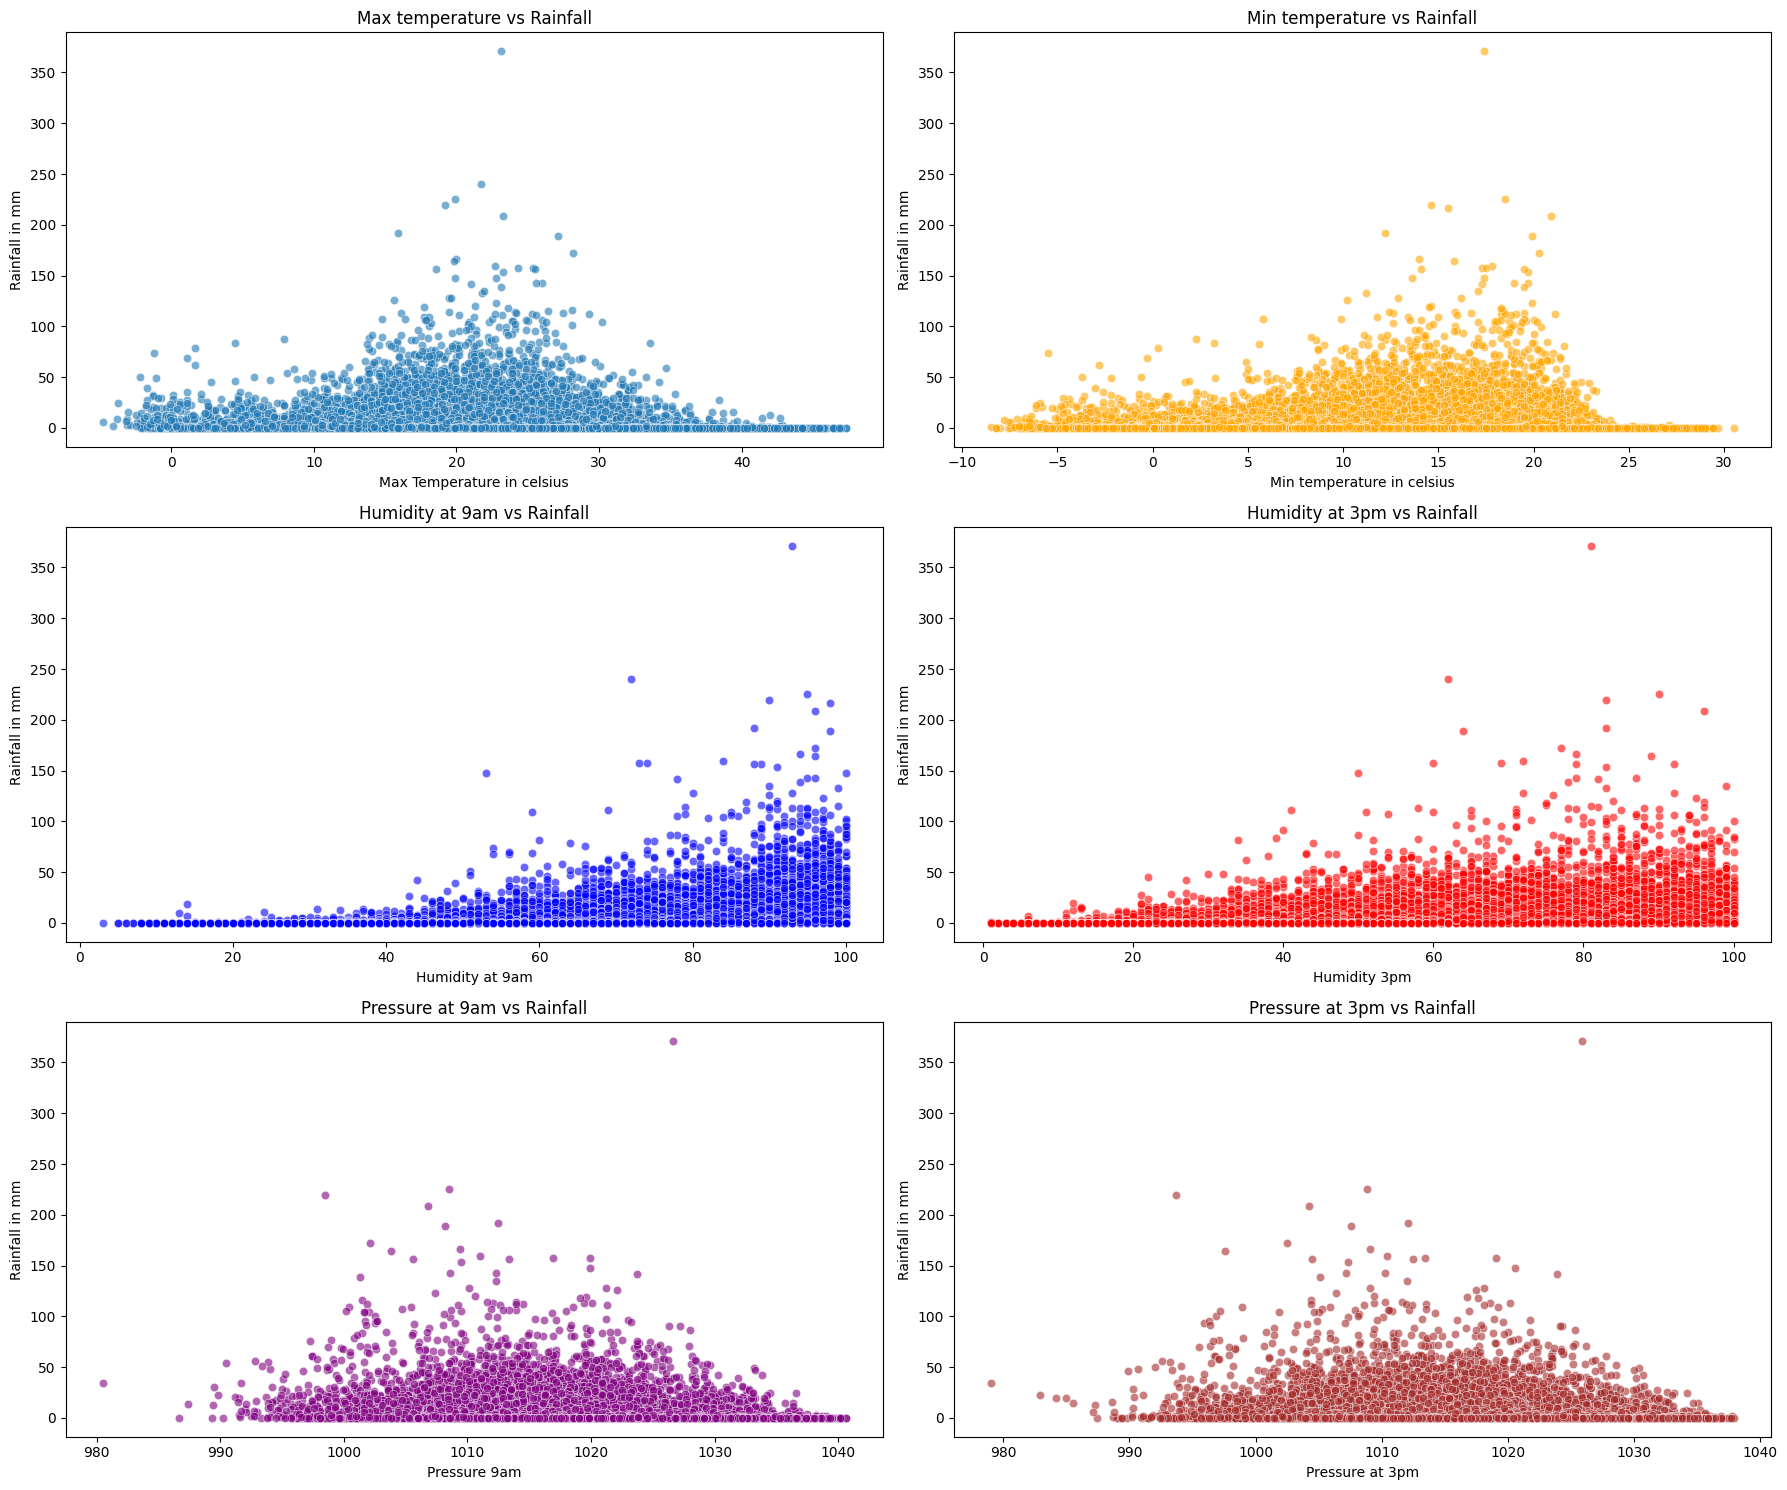

In [ ]:
#step - 7 relation between max temperature and rainfall

plt.figure(figsize=(18, 15))
#max temperature vs Rainfall
plt.subplot(3, 2, 1)
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df, alpha=0.6)
plt.title('Max temperature vs Rainfall')
plt.xlabel('Max Temperature in celsius')
plt.ylabel('Rainfall in mm')

#min Temperature vs Rainfall
plt.subplot(3, 2, 2)
sns.scatterplot(x='MinTemp', y='Rainfall', data=df, alpha=0.6, color='orange')
plt.title('Min temperature vs Rainfall')
plt.xlabel('Min temperature in celsius')
plt.ylabel('Rainfall in mm')

#humidity at 9am vs Rainfall
plt.subplot(3, 2, 3)
sns.scatterplot(x='Humidity9am', y='Rainfall', data=df, alpha=0.6, color='blue')
plt.title('Humidity at 9am vs Rainfall')
plt.xlabel('Humidity at 9am')
plt.ylabel('Rainfall in mm')

#humdity at 3pm vs Rainfall
plt.subplot(3, 2, 4)
sns.scatterplot(x='Humidity3pm', y='Rainfall', data=df, alpha=0.6, color='red')
plt.title('Humidity at 3pm vs Rainfall')
plt.xlabel('Humidity 3pm')
plt.ylabel('Rainfall in mm')

#pressure at 9am vs Rainfall
plt.subplot(3, 2, 5)
sns.scatterplot(x='Pressure9am', y='Rainfall', data=df, alpha=0.6, color='purple')
plt.title('Pressure at 9am vs Rainfall')
plt.xlabel('Pressure 9am')
plt.ylabel('Rainfall in mm')

#pressure at 3pm vs Rainfall
plt.subplot(3, 2, 6)
sns.scatterplot(x='Pressure3pm', y='Rainfall', data=df, alpha=0.6, color='brown')
plt.title('Pressure at 3pm vs Rainfall')
plt.xlabel('Pressure at 3pm')
plt.ylabel('Rainfall in mm')

plt.tight_layout()
plt.show()


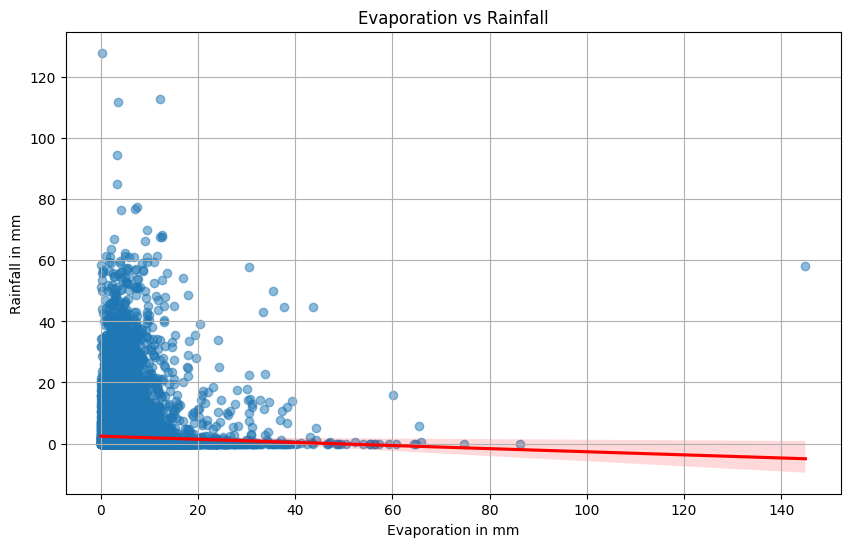

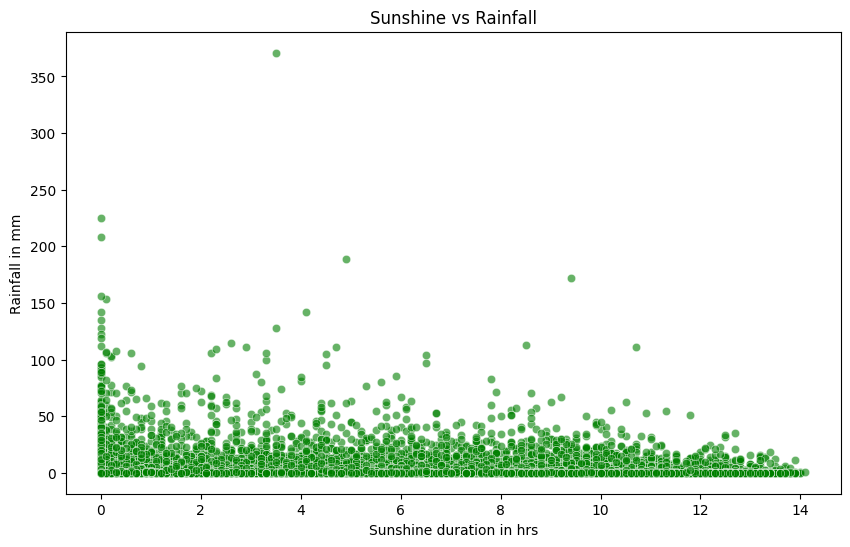

In [ ]:
#step - 8 humidity-related variables and rainfall

#reg plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Evaporation', y='Rainfall', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Evaporation vs Rainfall')
plt.xlabel('Evaporation in mm')
plt.ylabel('Rainfall in mm')
plt.grid(True)
plt.show()


#sunshine vs rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', alpha=0.6, color='green')
plt.title('Sunshine vs Rainfall')
plt.xlabel('Sunshine duration in hrs')
plt.ylabel('Rainfall in mm')
plt.show()


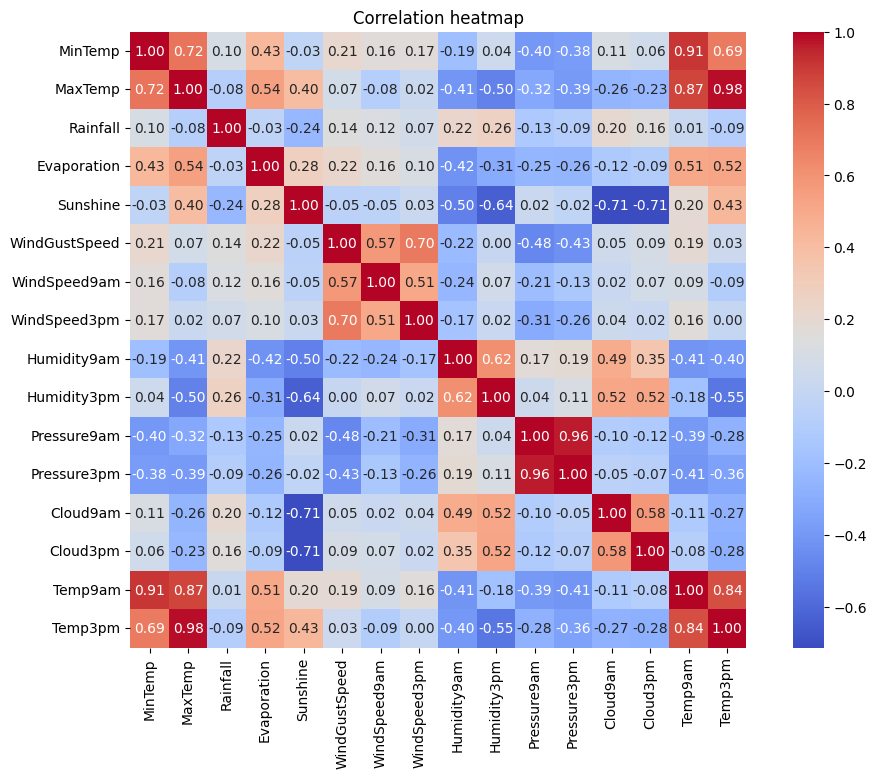

In [ ]:
#step 8 heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65298 entries, 0 to 65297
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           65298 non-null  object 
 1   Location       65298 non-null  object 
 2   MinTemp        64679 non-null  float64
 3   MaxTemp        64848 non-null  float64
 4   Rainfall       63842 non-null  float64
 5   Evaporation    28173 non-null  float64
 6   Sunshine       21365 non-null  float64
 7   WindGustDir    59227 non-null  object 
 8   WindGustSpeed  59235 non-null  float64
 9   WindDir9am     58624 non-null  object 
 10  WindDir3pm     62535 non-null  object 
 11  WindSpeed9am   63929 non-null  float64
 12  WindSpeed3pm   63311 non-null  float64
 13  Humidity9am    64016 non-null  float64
 14  Humidity3pm    63559 non-null  float64
 15  Pressure9am    55209 non-null  float64
 16  Pressure3pm    55261 non-null  float64
 17  Cloud9am       37937 non-null  float64
 18  Cloud3

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,64679.000000,64848.000000,63842.000000,28173.000000,21365.000000,59235.000000,63929.000000,63311.000000,64016.000000,63559.000000,55209.000000,55261.000000,37937.000000,37159.000000,64352.000000,63837.000000
mean,11.397842,22.321623,2.508418,5.310659,7.435301,39.810197,13.397941,18.245629,71.488237,53.019273,1018.261465,1015.823251,4.606664,4.671143,16.024733,20.879047
std,6.387053,6.887341,8.712657,4.313724,3.813798,14.230242,9.236760,9.379320,17.715577,20.697049,7.015152,6.901594,2.922153,2.715958,6.114159,6.707737
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.500000
50%,11.700000,22.000000,0.000000,4.400000,8.400000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.300000,1015.900000,5.000000,5.000000,16.400000,20.600000
75%,16.500000,26.700000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.500000,7.000000,7.000000,20.600000,25.000000
max,30.500000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [ ]:
#step - 1
#converting the Date column from object type to date format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#step - 2
#getting Month, day and year from date attribute
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

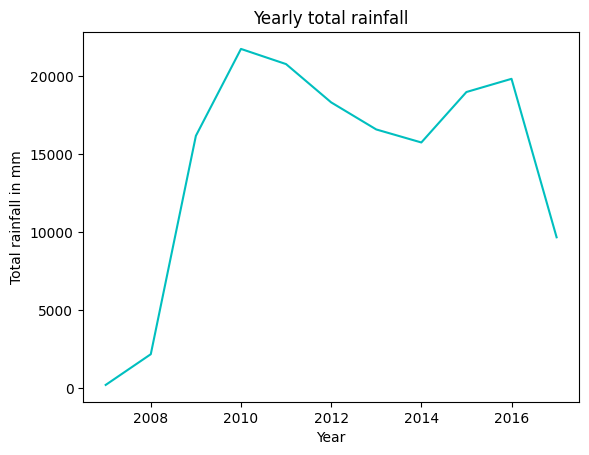

In [ ]:
#step - 9
#visulation of rainfall in differnt years
df.groupby('Year')['Rainfall'].sum().plot(kind='line', title='Yearly total rainfall', color='c')
plt.xlabel('Year')
plt.ylabel('Total rainfall in mm')
plt.show()

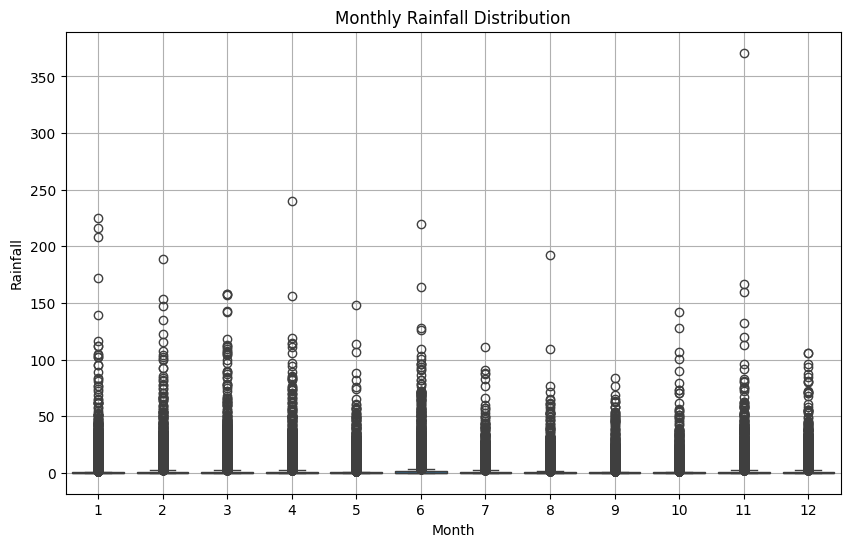

<ipython-input-17-5523784251a5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Season', y='Rainfall', data=df, jitter=True, palette='Set2')


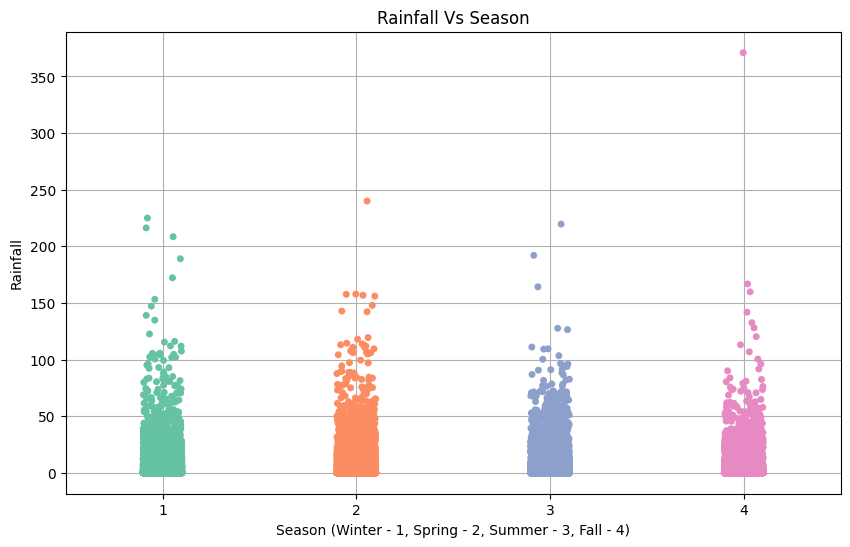

In [ ]:
df['Season'] = (df['Date'].dt.month % 12 // 3) + 1

#plot monthly rainfall trends
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Rainfall', data=df)
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()

#plot seasonal rainfall trends
plt.figure(figsize=(10, 6))
sns.stripplot(x='Season', y='Rainfall', data=df, jitter=True, palette='Set2')
plt.title('Rainfall Vs Season')
plt.xlabel('Season (Winter - 1, Spring - 2, Summer - 3, Fall - 4)')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()

In [ ]:
df.isnull().sum() / df.shape[0] *100

,0
Date,0.000000
Location,0.000000
MinTemp,0.947962
MaxTemp,0.689148
Rainfall,2.229777
Evaporation,56.854728
Sunshine,67.280774
WindGustDir,9.297375
WindGustSpeed,9.285124
WindDir9am,10.220834


In [ ]:
#step - 3
#getting all the categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
#checking the missing values from categorical variables
missing_cat = df[categorical].isnull().sum()
print(missing_cat)

Location           0
WindGustDir     6071
WindDir9am      6674
WindDir3pm      2763
RainToday       1457
RainTomorrow    1456
dtype: int64


In [ ]:
#filling the missing categoriical value with most frequent
imputer =  SimpleImputer(strategy='most_frequent')
df[categorical] = imputer.fit_transform(df[categorical])

In [ ]:
df[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0
RainTomorrow,0


In [ ]:
#step - 4
#handling missing value in numereical variables
missing_num = [var for var in df.columns if df[var].dtype !='O']
missing_num

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'Day',
 'Year',
 'Season']

In [ ]:
#handling the missing values usin median
numerical_median = df[missing_num].median()
df[missing_num] = df[missing_num].fillna(numerical_median)

In [ ]:
df[missing_num].isnull().sum()

,0
Date,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [ ]:
#step - 5
#performaing Label encoding on location
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport'], dtype=object)

In [ ]:
#label encoding the location
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [ ]:
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [ ]:
#step - 6
#one hot encoding the rest object variable
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype=int)


In [ ]:
#step - 7
#check for rows where MinTemp is greater than MaxTemp
logical_inconsistencies = df[df['MinTemp'] > df['MaxTemp']]
print("Rows with inconsistencies:")
print(logical_inconsistencies)

Rows with inconsistencies:
            Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
16120 2011-11-10        10     22.5     22.0       0.0          4.4       8.4   
16515 2013-01-09        10     23.4     22.0       0.0          4.4       8.4   
17599 2016-01-26        10     22.5     22.0       0.0          4.4       8.4   
17913 2016-12-05        10     22.4     22.0       0.0          4.4       8.4   
17975 2017-02-05        10     23.5     22.0       0.0          4.4       8.4   
18018 2017-03-20        10     23.0     22.0       1.2          4.4       8.4   
18028 2017-03-30        10     23.8     22.0       0.4          4.4       8.4   
18491 2010-01-12        11     22.8     22.0       0.0          4.4       8.4   
52249 2009-06-06         9     11.7      3.2       0.0          4.4       8.4   
52270 2009-06-27         9     11.7      4.2       0.0          4.4       8.4   
52280 2009-07-07         9     11.7     -1.3       0.0          4.4       8.4   
5

In [ ]:
#droped the rows where MinTemp > MaxTemp
df = df[~(df['MinTemp'] > df['MaxTemp'])]
print(df)

            Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01         0     13.4     22.9       0.6          4.4       8.4   
1     2008-12-02         0      7.4     25.1       0.0          4.4       8.4   
2     2008-12-03         0     12.9     25.7       0.0          4.4       8.4   
3     2008-12-04         0      9.2     28.0       0.0          4.4       8.4   
4     2008-12-05         0     17.5     32.3       1.0          4.4       8.4   
...          ...       ...      ...      ...       ...          ...       ...   
65293 2012-02-07         7     10.9     21.2       0.0          6.0       3.8   
65294 2012-02-08         7      8.9     21.7       0.0          5.6      11.1   
65295 2012-02-09         7      9.2     26.0       0.0          6.4      11.3   
65296 2012-02-10         7     15.3     25.8       0.0          6.2       7.0   
65297 2012-02-11         7     14.5     20.9      20.6          8.6       5.6   

       WindGustSpeed  WindS

In [ ]:
#step - 8
#removing the outliers based on IQR
def outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am',
                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Cloud3pm', 'Temp9am', 'Temp3pm']

df = outlier(df, numerical_cols)

In [ ]:
#step - 9
#dropped the date attribute
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
#step - 10
#mapping RainToday and RainTomorrow 0 and 1
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].astype(int)
df['RainToday'] = df['RainToday'].astype(int)

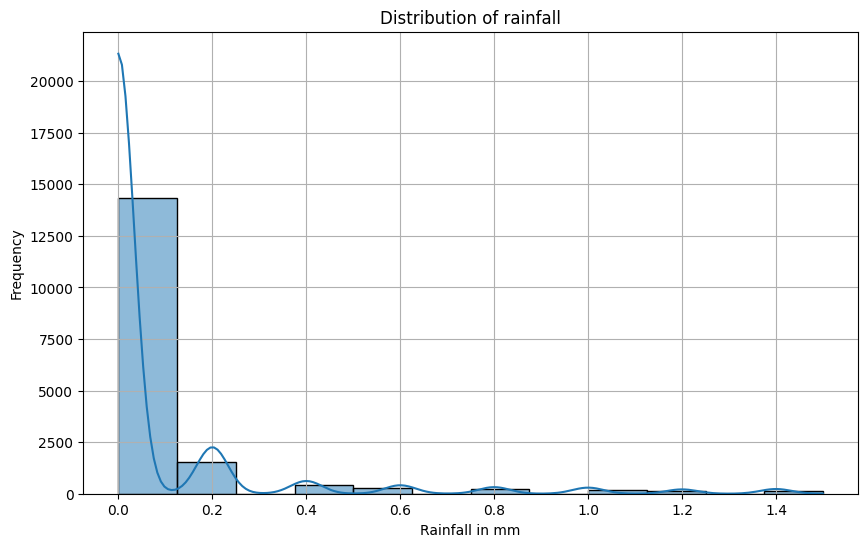

In [ ]:
#step - 10
# histogram plot of rainfall Vs Frequency
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=12, kde=True)
plt.title('Distribution of rainfall')
plt.xlabel('Rainfall in mm')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
df.RainTomorrow.unique()

array([0, 1])

In [ ]:
#step - 11
#capturing the important columns and deleting the rest of the columns
numeric_data = df.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
rain_corr = corr_matrix['RainTomorrow'].abs().sort_values(ascending=False)
important_features = rain_corr.head(16)
important_df = important_features.reset_index()
important_df.columns = ['Variable', 'Correlation']

print(important_df)



          Variable  Correlation
0     RainTomorrow     1.000000
1      Humidity3pm     0.302631
2      Humidity9am     0.149442
3         Rainfall     0.114848
4          MinTemp     0.108112
5      Pressure3pm     0.096840
6      Pressure9am     0.088900
7          Temp3pm     0.078700
8    WindGustSpeed     0.070708
9        RainToday     0.060863
10         MaxTemp     0.048436
11         Temp9am     0.047862
12  WindDir9am_SSW     0.047412
13    WindDir3pm_W     0.035215
14        Cloud9am     0.035077
15   WindGustDir_S     0.034760


In [ ]:
selected_cols = [
    'Humidity3pm', 'Sunshine', 'RainToday',
    'Cloud3pm', 'Humidity9am', 'Cloud9am', 'Pressure9am',
    'Rainfall', 'WindGustSpeed', 'Pressure3pm', 'Temp3pm',
    'MaxTemp', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm',
    'RainTomorrow'
]
final = df[selected_cols]
Y = df['RainTomorrow']
print(final.head())


   Humidity3pm  Sunshine  RainToday  Cloud3pm  Humidity9am  Cloud9am  \
0         22.0       8.4          0       5.0         71.0       8.0   
1         25.0       8.4          0       5.0         44.0       5.0   
3         16.0       8.4          0       5.0         45.0       5.0   
6         19.0       8.4          0       5.0         49.0       1.0   
7         19.0       8.4          0       5.0         48.0       5.0   

   Pressure9am  Rainfall  WindGustSpeed  Pressure3pm  Temp3pm  MaxTemp  \
0       1007.7       0.6           44.0       1007.1     21.8     22.9   
1       1010.6       0.0           44.0       1007.8     24.3     25.1   
3       1017.6       0.0           24.0       1012.8     26.5     28.0   
6       1009.6       0.0           50.0       1008.2     24.6     25.0   
7       1013.4       0.0           35.0       1010.1     25.5     26.7   

   Evaporation  WindSpeed9am  WindSpeed3pm  RainTomorrow  
0          4.4          20.0          24.0             0  
1   

In [ ]:
#step - 12
#apply standard scaling to features

X = final.drop(columns='RainTomorrow')
Y = final['RainTomorrow']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X_scaled.head())

   Humidity3pm  Sunshine  RainToday  Cloud3pm  Humidity9am  Cloud9am  \
0    -1.564143 -0.020831  -0.132109       0.0    -0.010482  2.642282   
1    -1.392014 -0.020831  -0.132109       0.0    -1.688710  0.052429   
2    -1.908401 -0.020831  -0.132109       0.0    -1.626554  0.052429   
3    -1.736272 -0.020831  -0.132109       0.0    -1.377927 -3.400707   
4    -1.736272 -0.020831  -0.132109       0.0    -1.440084  0.052429   

   Pressure9am  Rainfall  WindGustSpeed  Pressure3pm   Temp3pm   MaxTemp  \
0    -2.708493  2.204331       0.886176    -2.266195  0.046318 -0.015233   
1    -2.023375 -0.343023       0.886176    -2.096083  0.478605  0.349142   
2    -0.369644 -0.343023      -1.043091    -0.881000  0.859017  0.829456   
3    -2.259623 -0.343023       1.464957    -1.998877  0.530479  0.332580   
4    -1.361883 -0.343023       0.018006    -1.537145  0.686102  0.614143   

    Evaporation  WindSpeed9am  WindSpeed3pm  
0  8.881784e-16      1.361653      1.185210  
1  8.881784e-16   

In [ ]:
#step - 13
#removing the duplicates from the data
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Machine Learning Model**

In [ ]:
#splitting the dataset into train and test, train = 70% and test = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


In [ ]:
#Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification report:\n", classification_report(Y_test, y_pred))

Accuracy Score: 0.8931813791771296
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      4584
           1       0.64      0.16      0.25       593

    accuracy                           0.89      5177
   macro avg       0.77      0.57      0.60      5177
weighted avg       0.87      0.89      0.86      5177



In [ ]:
# import pickle

# with open('logreg_model.pkl', 'wb') as f:
#     pickle.dump(logreg_model, f)

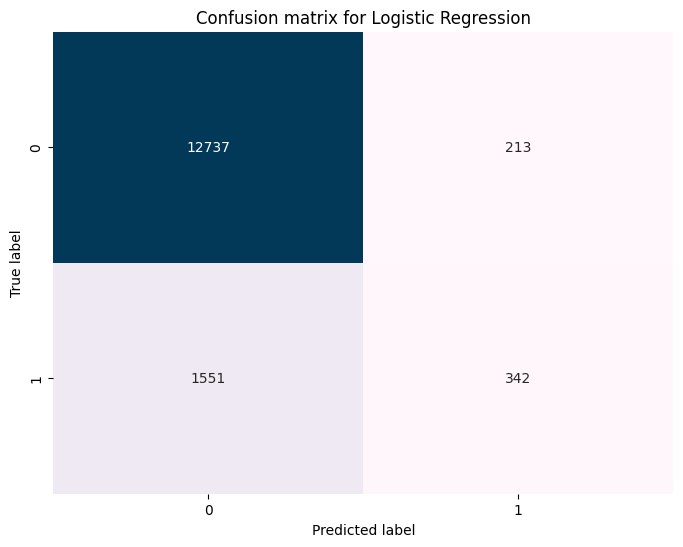

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='PuBu', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [ ]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification report:\n", classification_report(Y_test, y_pred))

Accuracy Score: 0.8678771489279505
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4584
           1       0.38      0.23      0.29       593

    accuracy                           0.87      5177
   macro avg       0.64      0.59      0.61      5177
weighted avg       0.84      0.87      0.85      5177



In [ ]:
# with open('nb_model.pkl', 'wb') as f:
#     pickle.dump(nb_model, f)

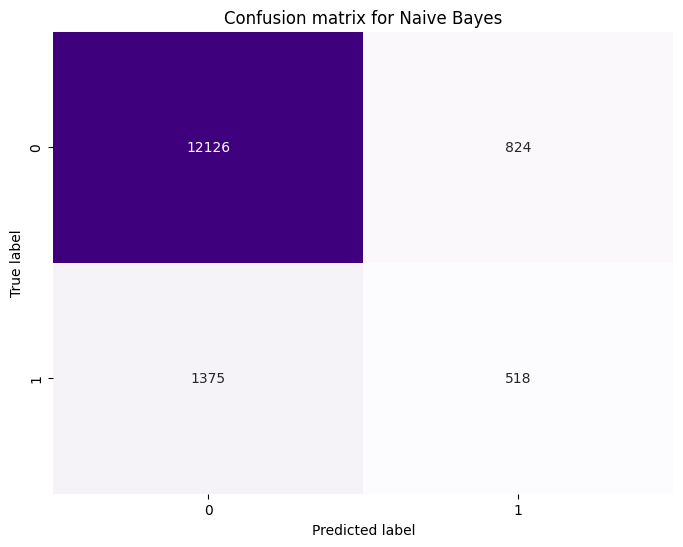

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Naive Bayes')
plt.show()

In [ ]:
#KNN with base model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification report:\n", classification_report(Y_test, y_pred))

Accuracy Score: 0.8768443037121876
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     12950
           1       0.55      0.19      0.28      1893

    accuracy                           0.88     14843
   macro avg       0.72      0.58      0.61     14843
weighted avg       0.85      0.88      0.85     14843



In [ ]:
# with open('knn_model.pkl', 'wb') as f:
#     pickle.dump(knn_model, f)

k = 2
Accuracy score: 0.8732735969817422
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     12950
           1       0.51      0.12      0.20      1893

    accuracy                           0.87     14843
   macro avg       0.70      0.55      0.56     14843
weighted avg       0.84      0.87      0.84     14843

k = 3
Accuracy score: 0.8664016708212625
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     12950
           1       0.45      0.22      0.30      1893

    accuracy                           0.87     14843
   macro avg       0.67      0.59      0.61     14843
weighted avg       0.84      0.87      0.85     14843

k = 4
Accuracy score: 0.8776527656134204
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93     12950
           1       0.60      0.13      

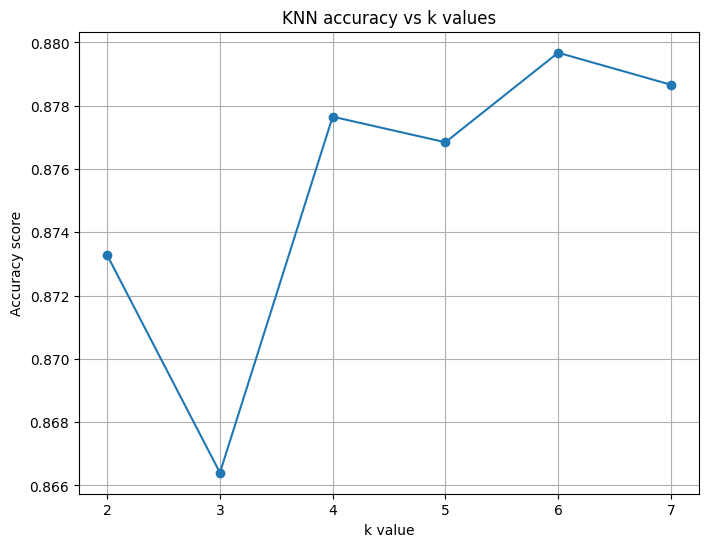

best k value: 6 with accuracy score: 0.8796739203665027


In [ ]:
k_values = range(2, 8)
accuracies = []
#KNN with hyper parameter tuning eith k values
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, Y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  accuracies.append(accuracy)
  print(f"k = {k}")
  print("Accuracy score:", accuracy)
  print("Classification report: \n", classification_report(Y_test, y_pred))


plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("k value")
plt.ylabel("Accuracy score")
plt.title("KNN accuracy vs k values")
plt.grid(True)
plt.show()

best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]
best_accuracy = max(accuracies)
print(f"best k value: {best_k} with accuracy score: {best_accuracy}")

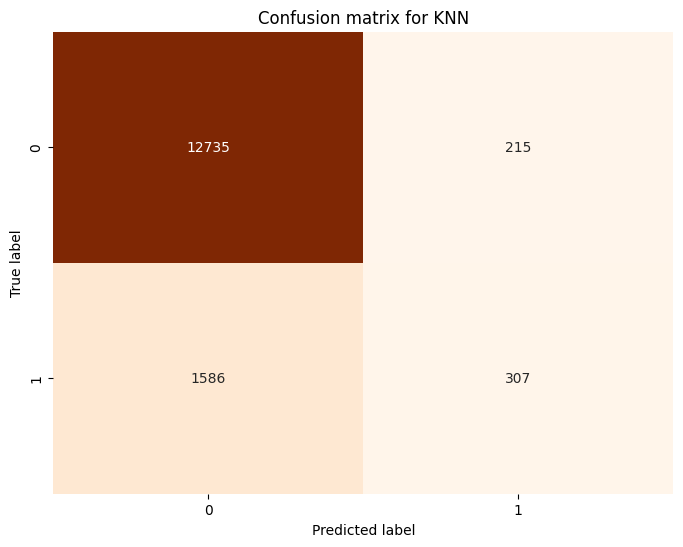

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for KNN')
plt.show()

In [ ]:
#Random forest
randomF_model = RandomForestClassifier(n_estimators=100, random_state=42)
randomF_model.fit(X_train, Y_train)
y_pred = randomF_model.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))


Accuracy Score: 0.8843899481236946
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     12950
           1       0.67      0.19      0.29      1893

    accuracy                           0.88     14843
   macro avg       0.78      0.59      0.61     14843
weighted avg       0.86      0.88      0.85     14843



In [ ]:
# with open('randomF_model.pkl', 'wb') as f:
#     pickle.dump(randomF_model, f)

feature importances:           Feature  Importance
0     Humidity3pm    0.165633
11        MaxTemp    0.104961
10        Temp3pm    0.097382
9     Pressure3pm    0.096690
4     Humidity9am    0.093660
6     Pressure9am    0.089702
8   WindGustSpeed    0.078053
14   WindSpeed3pm    0.067389
13   WindSpeed9am    0.066117
1        Sunshine    0.040434
12    Evaporation    0.028427
5        Cloud9am    0.027622
7        Rainfall    0.026239
3        Cloud3pm    0.014976
2       RainToday    0.002716


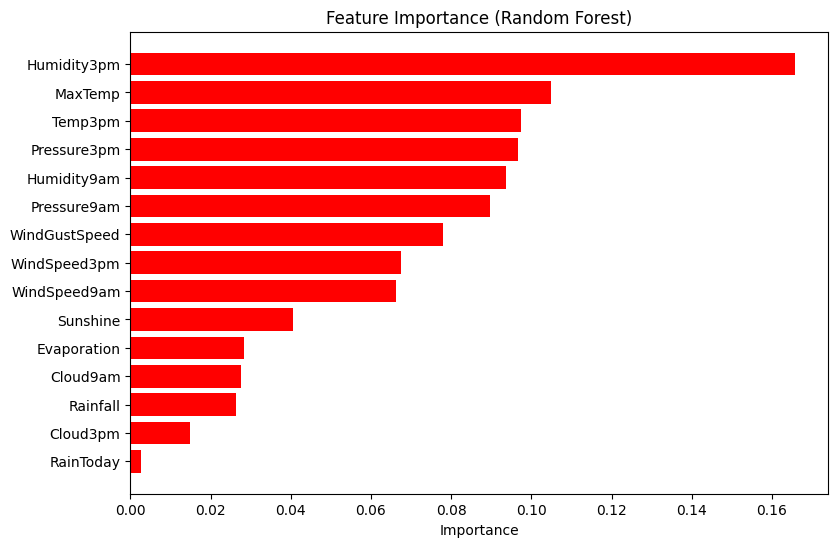

In [ ]:
feature_i = randomF_model.feature_importances_
feature = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
imp_df = pd.DataFrame({'Feature': feature, 'Importance': feature_i})
imp_df = imp_df.sort_values(by='Importance', ascending=False)
print("feature importances:", imp_df)
plt.figure(figsize=(9, 6))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

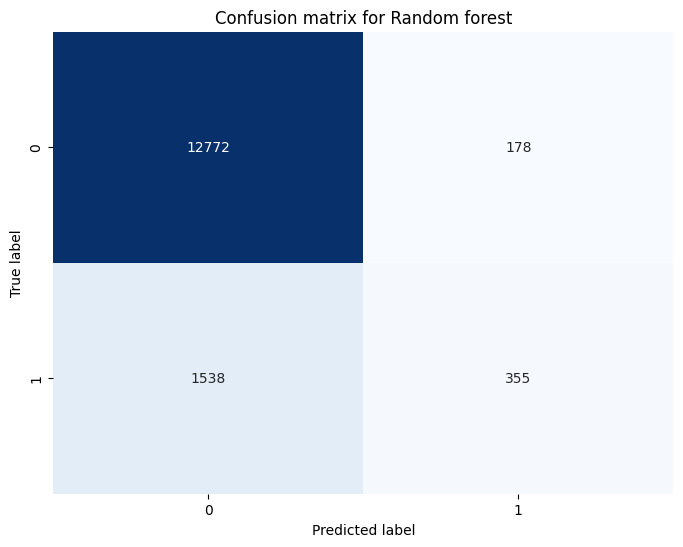

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Random forest')
plt.show()

In [ ]:
#SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))


Accuracy Score: 0.881964562419996
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     12950
           1       0.73      0.12      0.20      1893

    accuracy                           0.88     14843
   macro avg       0.81      0.56      0.57     14843
weighted avg       0.87      0.88      0.84     14843



In [ ]:
# with open('svm_model.pkl', 'wb') as f:
#     pickle.dump(svm_model, f)

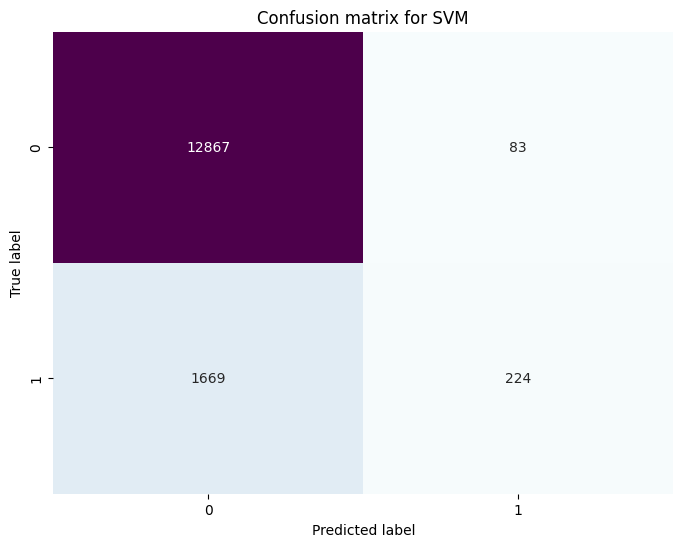

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for SVM')
plt.show()

In [ ]:
#XGB_classifier
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)

X_test_np = np.array(X_test)
Y_test_np = np.array(Y_test)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=43)
xgb_model.fit(X_train_np, Y_train_np)
y_pred = xgb_model.predict(X_test_np)


print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score: 0.8823687933706124
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12950
           1       0.60      0.24      0.34      1893

    accuracy                           0.88     14843
   macro avg       0.75      0.61      0.64     14843
weighted avg       0.86      0.88      0.86     14843



In [ ]:
# with open('xgb_model.pkl', 'wb') as f:
#     pickle.dump(xgb_model, f)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


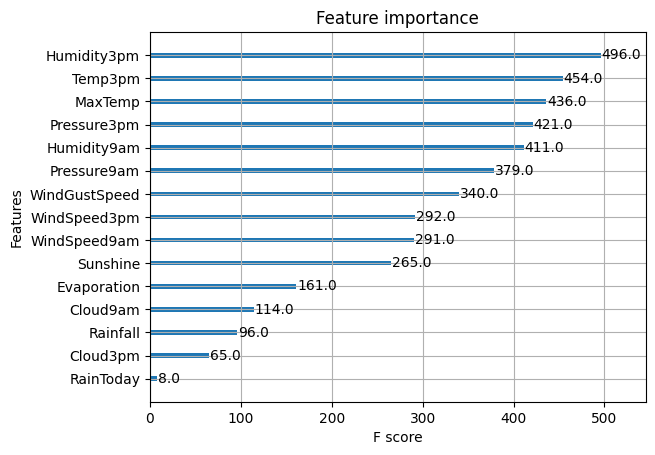

In [ ]:
model = xgb.train(params=xgb_model.get_xgb_params(),
                  dtrain=xgb.DMatrix(X_train, label=Y_train),
                  num_boost_round=100)
xgb.plot_importance(model, importance_type="weight")
plt.show()

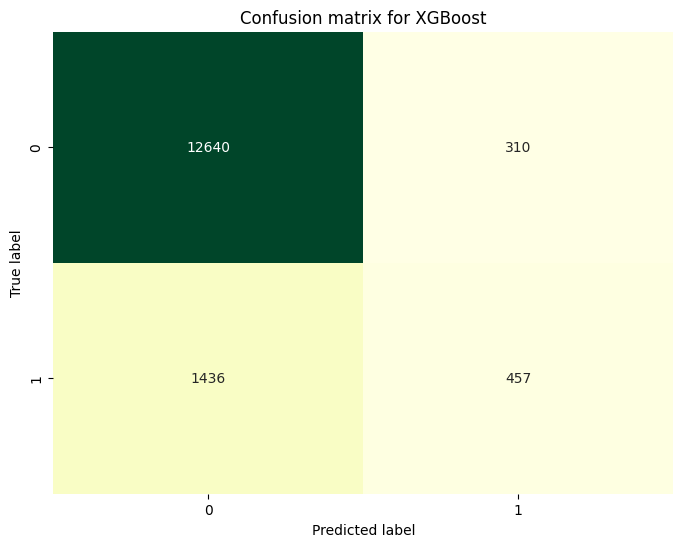

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for XGBoost')
plt.show()

In [ ]:
#LGBM_Classifier
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, Y_train)
y_pred = lgb_model.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))


[LightGBM] [Info] Number of positive: 4441, number of negative: 30192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1486
[LightGBM] [Info] Number of data points in the train set: 34633, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128230 -> initscore=-1.916697
[LightGBM] [Info] Start training from score -1.916697
Accuracy Score: 0.8849289227245166
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12950
           1       0.65      0.21      0.32      1893

    accuracy                           0.88     14843
   macro avg       0.77      0.60      0.63     14843
weighted avg       0.86      0.88      0.86     14843



In [ ]:
# with open('lgb_model.pkl', 'wb') as f:
#     pickle.dump(lgb_model, f)

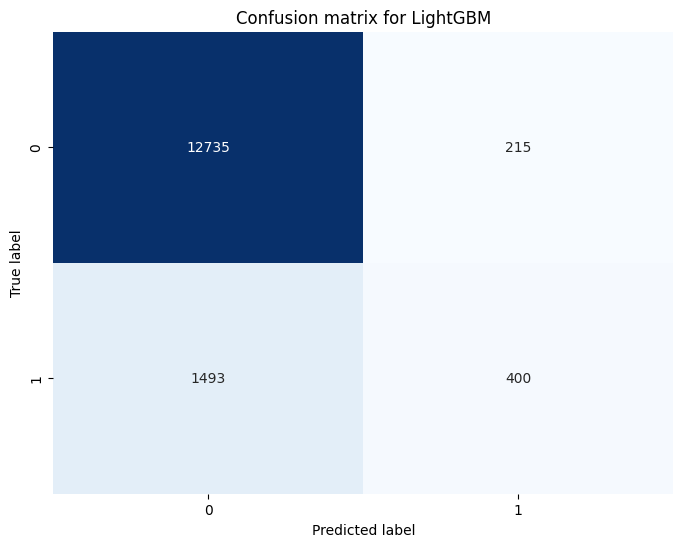

In [ ]:
con_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for LightGBM')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score  # Replace with your desired metric

models = [logreg_model, nb_model, knn_model, randomF_model, svm_model, xgb_model, lgb_model]

best_accuracy = 0
best_model = None

for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: LGBMClassifier(random_state=42)
Best Accuracy: 0.8849289227245166


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pickle

with open('lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

In [ ]:
!pip install streamlit ngrok

import streamlit as st

st.title("My First Streamlit App")
st.write("Hello, world!")


!streamlit run
!ngrok http 8501
public_url = ngrok.connect(port=8501)
print(f"Streamlit app is live at: {public_url}")

2024-11-21 19:45:04.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 19:45:04.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 19:45:04.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 19:45:04.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 19:45:04.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-21 19:45:04.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Missing argument 'TARGET'.
http - start an HTTP tunnel

USAGE:
  ngrok http [address:port | port] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain


NameError: name 'ngrok' is not defined